In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile 

from ipywidgets import interactive
from IPython.display import Audio, display

In [ ]:
# FINAL GRADE: 12/25

The audio file in the directory that this notebook is in, `Fa50.wav`, comes from [Sameer ud Dowla Khan](http://www.reed.edu/linguistics/khan/index.html) at Reed College. It is an utterance of Bengali illustrating how Bengali intonational events chunk utterances into prosodic phrases. See page 101 of Khan's [dissertation on Bengali intonation](http://www.reed.edu/linguistics/khan/assets/Khan%202008%20disseration%20Intonational%20phonology%20and%20focus%20prosody%20of%20Bengali.pdf).

Here's an annotated f0 contour of `Fa50.wav` from that page.
![title](Fa50.png)

You will be doing some work with this audio file in this problem set.

## Problem 1: converting from samples to time

Write a function that:
- plots the audio data from `t_start` to `t_stop`, with time in seconds on the x-axis
- creates an Audio object you can play, playing the audio data from `t_start` to `t_stop`.
- if you like, you can generate an interactive "widget" like we saw in the Class 2.2 notebook, where you can manipulate sliders and then see the plot and have the audio change.

You can take a look at the sample code for converting from samples to time in Class 2.2's notebook, but remember that there are problems with that code. You can do way better!

In [ ]:
# PROBLEM 1: 3/6
# See missing parentheses notes
# You're plotting a constant for y against x. len(sr) is a constant.


In [14]:
fs, Fa50 = wavfile.read('Fa50.wav')

def plot_play_audio(t_start = 0, t_stop = 1, audio_filename = 'Fa50.wav'):
    fs, amp = wavfile.read(audio_filename)
    ns = len(amp)
    sr = ns/fs
    #ns = (t_stop - t_start) * fs + 1
    #sr = len(amp)/fs
    #sr = ns/fs
    x = np.linspace(t_start, t_stop, sr)
    
    #print(len(amp[samprate]))
    #print(len(x))
    plt.xlim(t_start,t_stop)
    plt.plot(x,(len(sr)   # YOU'RE MISSING PARENTHESES CLOSING
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (dB)')
    plt.title("Audio") 
    
    display(Audio(data=amp, rate=fs))

plot_play_audio(t_start = 0, t_stop = 4)



#t_start = 0 # We start sampling at t = 0s
#t_stop =  1 # We stop sampling at t = 1s

#ns = (t_stop - t_start) * fs + 1

#x = np.linspace(t_start, t_stop, ns)


# plot the first n samples
#plt.plot(x, Fa50[0:ns])
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude (dB)')
# set the title  
#plt.title("Ha wave file")

#still trying to figure this out ... have tried so many things I lost track

ValueError: Unsupported bit depth: the wav file has 24-bit data.

In [10]:
v = interactive(plot_play_audio, fs=(22000), t_start = 0, t_stop = len(ns))
display(v)

# how do (length of clip to match t_stop)
# tried (Fa50), (ns/fs)
# easy cheater way in next cell

NameError: name 'plot_play_audio' is not defined

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


TypeError: object of type 'float' has no len()

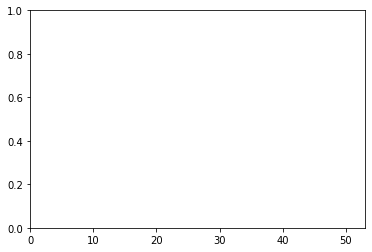

In [123]:
v = interactive(plot_play_audio, fs=(1000), t_start = (0), t_stop = (53))
display(v)

## Problem 2: resampling audio data and writing it to file

The purpose of this problem is to:
- introduce you to [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html), which we will be continuing to use during the course.
- have you figure out how to write data to audio files
- give you experience with figuring out how to use unfamiliar functions own your own
- get you thinking more about the effect of sampling rates on representing signals

*n.b. in my past experience, people have sometimes had problems using `scipy.signal`'s resampling function on their machine. If that ends up being the case for you, you might try instead [`librosa`](https://librosa.github.io/librosa/)'s sampling function.*


1. Resample the bengali audio data using `scipy.signal.resample`, plot the resampled data, and also create a playable Audio object of the resampled data. Do this for two sampling rates: two times the original sampling rate of the file, and half of the original sampling rate of the file. Note: you may need to use `round()` and `int()` to coerce the number of samples to be an integer.
2. Try to explain why the audio sounds the way it does for the upsampled and downsampled audio.
3. Write the re-sampled audio to WAV files in the current directory using `scipy.io.wavfile.write`.
4. Use `scipy.io.wavfile.read` to read in your re-sampled files and check that the sampling rate is what you expect.







In [ ]:
## Grading Notes 4/7
# 1. missing plots, otherwise correct 1/2
# 2. correct 2/2 - Key point is what we covered in class about aliasing and what happens with undersampling. When things are undersampled, they tend to sound lower pitched because of aliasing.
# 3. correct 1/2, no file written
# 4. correct 0/1 missing

In [6]:
import librosa

y, sr = librosa.load("Fa50.wav")
print(type(y)) # Note that it is a numpy array
print("The sampling rate is: ", sr, "Hz")


y_twice = librosa.resample(y, sr, sr*2)
y_half = librosa.resample(y, sr, sr/2)


display(Audio(data=y_twice,rate = sr*2))
display(Audio(data=y_half,rate = sr/2))

print("the first one will sound the same, as you can not add more data (samples) ")
print("than what is already there")
print("the second one is losing half of the samples, so it will not be as crisp, clear, ")
print("or accurate, as it is filling in the gaps, and there is greater distance between")
print("sampling amplitudes that can be recorded")




<class 'numpy.ndarray'>
The sampling rate is:  22050 Hz


the first one will sound the same, as you can not add more data (samples) 
than what is already there
the second one is losing half of the samples, so it will not be as crisp, clear, 
or accurate, as it is filling in the gaps, and there is greater distance between
sampling amplitudes that can be recorded


In [8]:
import soundfile as sf
rate = 44100
data = np.random.uniform(-1, 1, size=(rate * 10, 2))
new_Fa50 = sf.write('Fa50.wav', data, sr, subtype='PCM_24')

display(Audio(data=new_Fa50))

ValueError: No audio data found. Expecting filename, url, or data.

## Problem 3: Fourier series of a square wave

We will be going over the introductory material you need for this on Tuesday 09/17, so feel free to wait until then to get started on this problem if you like.

### Define a square wave.
1. Define a function for a [square wave](http://mathworld.wolfram.com/SquareWave.html) with a period of 1, with y = 1 from x = 0 to 0.5, and y = 0 from x = 0.5 to 1. You might see if there are any functions in `scipy.signal` that could help.
2. Make a plot of your square wave showing 5 periods.

### Reconstruct the square wave using a Fourier series.
1. Calculate the Fourier coefficients for a square wave.  Note: there are an infinite number of
coefficients, so just calculate the first six. Try to find a
pattern for the coefficient values of the infinite series.
2. Plot the individual Fourier series terms, i.e., make plots of each of the following:
\begin{align}
      a_0\\
      a_1\cos(2\pi nt) + b_1\sin(2\pi nt)\\
      a_2\cos(2\pi nt) + b_2\sin(2\pi nt)\\
      a_3\cos(2\pi nt) + b_3\sin(2\pi nt)\\
      a_4\cos(2\pi nt) + b_4\sin(2\pi nt)\\
      a_5\cos(2\pi nt) + b_5\sin(2\pi nt)
\end{align}

3. Plot the reconstruction of the square wave as you add in successive terms in the Fourier series, i.e., make plots of each of the following (I am subsuming $a_0$ as a term in the sum by having the sum start from $n=0$):

\begin{align}
      \displaystyle\sum\limits_{n=0}^0 \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)\\
       \displaystyle\sum\limits_{n=0}^1 \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)\\
        \displaystyle\sum\limits_{n=0}^2 \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)\\
         \displaystyle\sum\limits_{n=0}^3 \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)\\
          \displaystyle\sum\limits_{n=0}^4 \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)\\
           \displaystyle\sum\limits_{n=0}^5 \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)\\
\end{align}


In [ ]:
## Grading notes: 5/12
# Define the square wave
# 1. correct 2/2
# 2. correct 1/1


# Reconstruct using fourier series
# 1. missing 0/3
# 2. partial credit 1/3: plots on right track
# 3. partial credit 1/3: plots don't show the sum of terms, only individual terms

Define a square wave


(0, 5)

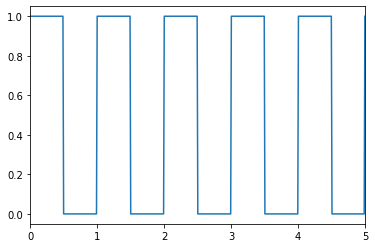

In [3]:
print ("Define a square wave")

import scipy.signal as signal

t = np.linspace(0, 5, 500)
plt.plot(t, .5 +.5 * signal.square(2*np.pi*1*t))
plt.xlim(0,5)



plot individual Fourier terms


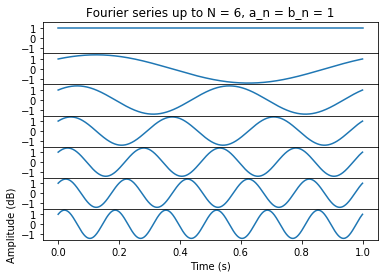

In [4]:
print ("plot individual Fourier terms")

t_start = 0; t_stop = 1; fs = 1000
x = np.linspace(t_start, t_stop, fs * (t_stop - t_start))
y = [(np.sin(2*np.pi*n*x)) + (np.cos(2*np.pi*n*x)) for n in np.arange(0,7)]

f_fourier_series, (ax1, ax2, ax3, ax4, ax5, ax6,ax7) = plt.subplots(7, sharex=True, sharey=True)
ax1.plot(x , y[0], label="n = 0")
ax1.set_title('Fourier series up to N = 6, a_n = b_n = 1')
ax2.plot(x , y[1], label="n = 1")
ax3.plot(x , y[2], label="n = 2")
ax4.plot(x , y[3], label="n = 3")
ax5.plot(x , y[4], label="n = 4")
ax6.plot(x , y[5], label="n = 5")
ax7.plot(x , y[6],"-", label="n = 6")

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')

# not sure how to change x ticks, have tried subbing ax7 for a or ax7 for .axes
# 
f_fourier_series.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f_fourier_series.axes[:-2]], visible=False)

reconstruction of square waves


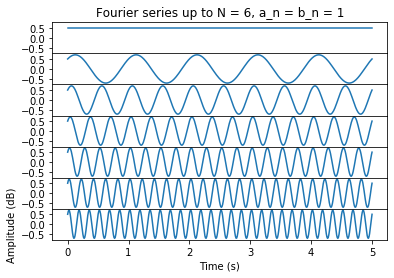

In [5]:
print ("reconstruction of square waves")

x = np.linspace(0, 5, 500)
y = [(.5 * np.sin(2*np.pi*n*x)) + (.5 * np.cos(2*np.pi*n*x)) for n in np.arange(0,7)]

#t = np.linspace(0, 5, 500)
#plt.plot(t, .5 +.5 * signal.square(2*np.pi*1*t))
#plt.xlim(0,5)



f_fourier_series, (ax1, ax2, ax3, ax4, ax5, ax6,ax7) = plt.subplots(7, sharex=True, sharey=True)
ax1.plot(x , y[0], label="n = 0")
ax1.set_title('Fourier series up to N = 6, a_n = b_n = 1')
ax2.plot(x , y[1], label="n = 1")
ax3.plot(x , y[2], label="n = 2")
ax4.plot(x , y[3], label="n = 3")
ax5.plot(x , y[4], label="n = 4")
ax6.plot(x , y[5], label="n = 5")
ax7.plot(x , y[6],"-", label="n = 6")


plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')

# not sure how to change x ticks, have tried subbing ax7 for a or ax7 for .axes
# 
f_fourier_series.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f_fourier_series.axes[:-2]], visible=False)